### List of questions:
- Who were the passengers? (Ages, Gender, Class ...)
- What deck were the passengers on and how does that relate to thier class?
- Where did the passengers come from?
- Who was alone and who was with family?
- What factors helped someone survive the sinking?

In [325]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [326]:
# import data from data file
train_df = pd.read_csv(r"C:\Users\lonj7\MyWork\Data\Titanic\train.csv", sep=',')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [327]:
train_df.info()
# Some feature has missed data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##### Fill missin vlaues

In [328]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [329]:
train_df['Sex'] = train_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [330]:
for i in range(0, 2):
    for j in range(0, 3):
        guess_df = train_df[(train_df['Sex'] == i) & (train_df['Pclass'] == j+1)]['Age'].dropna()
        # age_mean = guess_df.mean()
        # age_std = guess_df.std()
        # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)
        age_guess = guess_df.median()
        # Convert random age float to nearest .5 age
        guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
for i in range(0, 2):
    for j in range(0, 3):
        train_df.loc[ (train_df.Age.isnull()) & (train_df.Sex == i) & (train_df.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

train_df['Age'] = train_df['Age'].astype(int)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,S


In [331]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    int32  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int32(2), int64(5), object(4)
memory usage: 76.7+ KB


In [332]:
train_df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.072952,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,13.326339,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,21.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,36.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [333]:
train_df.describe(include=['O'])
#train_df.describe(include='all')

,Name,Ticket,Cabin,Embarked
count,891,891,204,889
unique,891,681,147,3
top,"Giglio, Mr. Victor",CA. 2343,C23 C25 C27,S
freq,1,7,4,644


I could know that Age, Embarked and Cabin have missed data.\
I will fill the data later...

#### Age

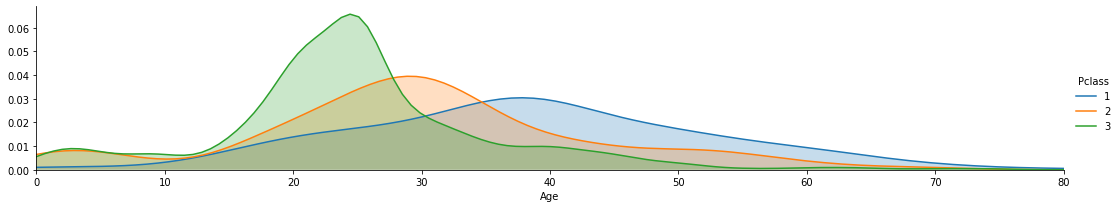

In [334]:
fig = sns.FacetGrid(train_df, hue = 'Pclass', aspect = 5)
fig.map(sns.kdeplot,'Age',shade= True)

fig.set(xlim=(0,train_df['Age'].max()))
fig.add_legend()

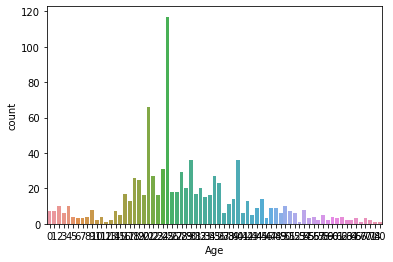

In [335]:
# Let's check distribution of Ages.
sns.countplot("Age", data=train_df)

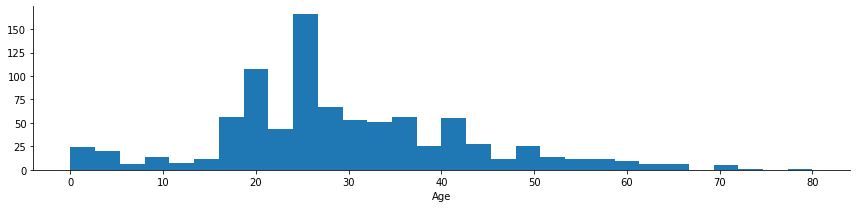

In [336]:
g = sns.FacetGrid(train_df, aspect=4)
g.map(plt.hist, 'Age', bins=30)

In [337]:
# make an age band with 10 years gap.
bins = pd.IntervalIndex.from_tuples([(0, 9), (10, 19), (20, 29),
                                     (30, 39), (40, 49), (50, 59), (60, 69), (70, 79), (80, 89)])
train_df['AgeBand_10'] = pd.cut(train_df['Age'], bins)

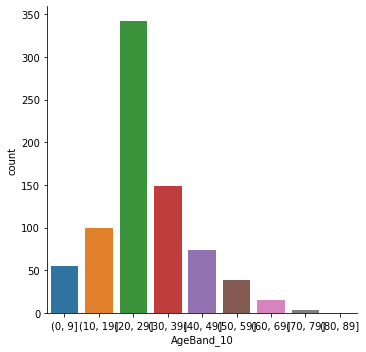

In [338]:
sns.catplot('AgeBand_10', data=train_df, kind='count')

In [339]:
# make an ageband
train_df['AgeBand']=pd.cut(train_df['Age'], 5)
train_df['AgeBand'].value_counts()

(16.0, 32.0]     495
(32.0, 48.0]     216
(-0.08, 16.0]    100
(48.0, 64.0]      69
(64.0, 80.0]      11
Name: AgeBand, dtype: int64

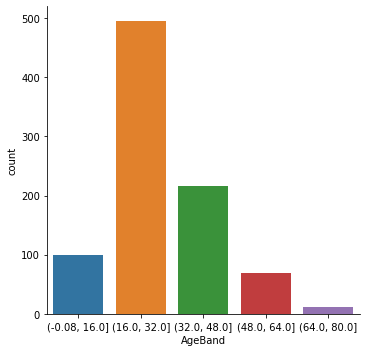

In [340]:
sns.catplot('AgeBand', data=train_df, kind='count')

In [341]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand_10,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,S,"(20, 29]","(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,C,"(30, 39]","(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,S,"(20, 29]","(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,S,"(30, 39]","(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,S,"(30, 39]","(32.0, 48.0]"


In [342]:
train_df['Age_10']=train_df['Age'].copy(deep=True)

In [343]:
# replace age data to two features: AgeBand_10, and AgeBand

# AgeBand_10
for num in range(0,9):    
    train_df.loc[(train_df['Age'] >= (num*10)) & (train_df['Age'] < ((num+1)*10)), 'Age_10'] = num

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand_10,AgeBand,Age_10
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,S,"(20, 29]","(16.0, 32.0]",2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,C,"(30, 39]","(32.0, 48.0]",3
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,S,"(20, 29]","(16.0, 32.0]",2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,S,"(30, 39]","(32.0, 48.0]",3
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,S,"(30, 39]","(32.0, 48.0]",3


In [344]:
# AgeBand
train_df.loc[ train_df['Age'] <= 16, 'Age'] = 0
train_df.loc[(train_df['Age'] > 16) & (train_df['Age'] <= 32), 'Age'] = 1
train_df.loc[(train_df['Age'] > 32) & (train_df['Age'] <= 48), 'Age'] = 2
train_df.loc[(train_df['Age'] > 48) & (train_df['Age'] <= 64), 'Age'] = 3
train_df.loc[ train_df['Age'] > 64, 'Age'] = 4
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand_10,AgeBand,Age_10
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,S,"(20, 29]","(16.0, 32.0]",2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,C,"(30, 39]","(32.0, 48.0]",3
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,S,"(20, 29]","(16.0, 32.0]",2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,S,"(30, 39]","(32.0, 48.0]",3
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,S,"(30, 39]","(32.0, 48.0]",3


In [345]:
# drop AgeBand_10, AgeBand
train_df.drop(['AgeBand_10', 'AgeBand'], axis=1, inplace=True)

# train_df=train_df.drop(['AgeBabd_10', 'AgeBand'], axis=1)

#### Pclass, Embarked, Fare

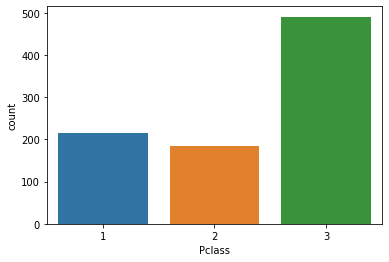

In [346]:
# Let's check the distribution of Pclass
sns.countplot('Pclass', data=train_df)

In [347]:
train_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

#### Fare

In [348]:
len(train_df['Fare'].unique())

248

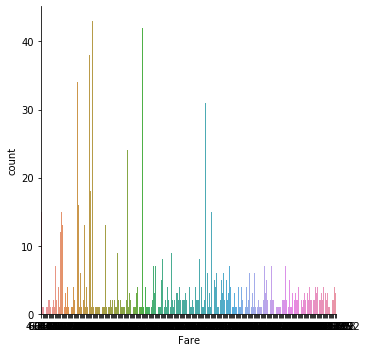

In [349]:
sns.catplot("Fare", data=train_df, kind='count')

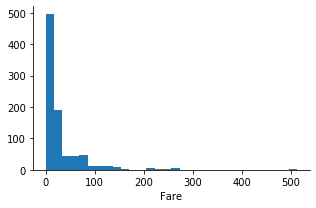

In [350]:
g = sns.FacetGrid(train_df, aspect=1.5)
g.map(plt.hist, 'Fare', bins=30)

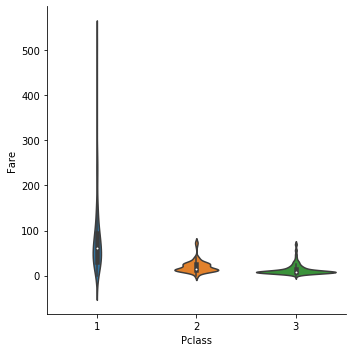

In [351]:
# fare and Pclass
sns.catplot(x='Pclass', y='Fare', data=train_df, kind='violin')

In [352]:
train_df[['Pclass', 'Fare']].groupby('Pclass').mean()

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


In [353]:
train_df[['Embarked', 'Pclass', 'Fare']].groupby(['Embarked', 'Pclass']).mean()

Fare
Embarked Pclass            
C        1       104.718529
         2        25.358335
         3        11.214083
Q        1        90.000000
         2        12.350000
         3        11.183393
S        1        70.364862
         2        20.327439
         3        14.644083

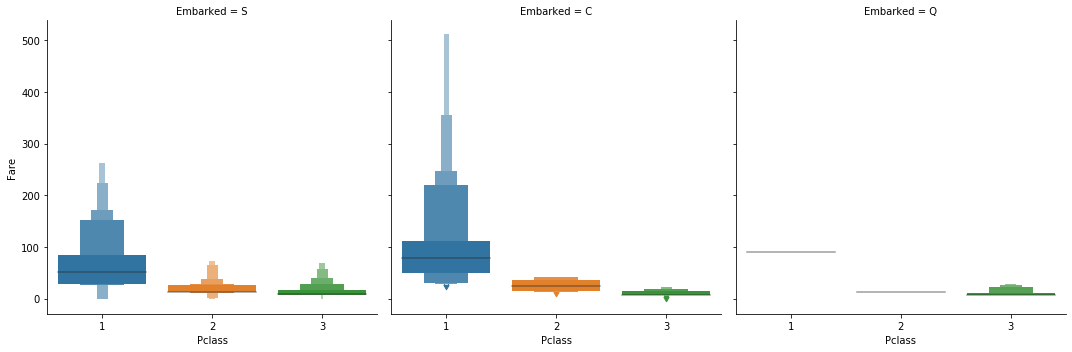

In [354]:
# visualization
sns.catplot('Pclass', 'Fare', col='Embarked', data=train_df, kind='boxen')

In [355]:
train_df['Fare'].fillna(train_df['Fare'].dropna().median(), inplace=True)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_10
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,S,3


In [356]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [357]:
train_df.loc[ train_df['Fare'] <= 7.91, 'Fare'] = 0
train_df.loc[(train_df['Fare'] > 7.91) & (train_df['Fare'] <= 14.454), 'Fare'] = 1
train_df.loc[(train_df['Fare'] > 14.454) & (train_df['Fare'] <= 31), 'Fare']   = 2
train_df.loc[ train_df['Fare'] > 31, 'Fare'] = 3
train_df['Fare'] = train_df['Fare'].astype(int)

In [358]:
# fill NaN in Embarked feature with most common value!
freq_port = train_df.Embarked.dropna().mode()[0]
train_df['Embarked'] = train_df['Embarked'].fillna(freq_port)

In [359]:
train_df.loc[(train_df['Embarked'] == 'C') & (train_df['Pclass'] == 1), 'ClassEmbarked'] = 0
train_df.loc[(train_df['Embarked'] == 'S') & (train_df['Pclass'] == 1), 'ClassEmbarked'] = 1
train_df.loc[(train_df['Embarked'] == 'Q') & (train_df['Pclass'] == 1), 'ClassEmbarked'] = 2
train_df.loc[(train_df['Embarked'] == 'C') & (train_df['Pclass'] == 2), 'ClassEmbarked'] = 3
train_df.loc[(train_df['Embarked'] == 'S') & (train_df['Pclass'] == 2), 'ClassEmbarked'] = 4
train_df.loc[(train_df['Embarked'] == 'Q') & (train_df['Pclass'] == 2), 'ClassEmbarked'] = 5
train_df.loc[(train_df['Embarked'] == 'C') & (train_df['Pclass'] == 3), 'ClassEmbarked'] = 6
train_df.loc[(train_df['Embarked'] == 'S') & (train_df['Pclass'] == 3), 'ClassEmbarked'] = 7
train_df.loc[(train_df['Embarked'] == 'Q') & (train_df['Pclass'] == 3), 'ClassEmbarked'] = 8

In [360]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_10,FareBand,ClassEmbarked
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,NaN,S,2,"(-0.001, 7.91]",7.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,3,C85,C,3,"(31.0, 512.329]",0.0
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,1,NaN,S,2,"(7.91, 14.454]",7.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,3,C123,S,3,"(31.0, 512.329]",1.0
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,1,NaN,S,3,"(7.91, 14.454]",7.0


#### Number of family = SibSp + Parch

In [361]:
train_df['Num of Family'] = train_df['Parch'] + train_df['SibSp']

In [362]:
train_df['Family'] = 0

train_df.loc[train_df['Num of Family'] > 0, 'Family'] = 1

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_10,FareBand,ClassEmbarked,Num of Family,Family
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,NaN,S,2,"(-0.001, 7.91]",7.0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,3,C85,C,3,"(31.0, 512.329]",0.0,1,1
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,1,NaN,S,2,"(7.91, 14.454]",7.0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,3,C123,S,3,"(31.0, 512.329]",1.0,1,1
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,1,NaN,S,3,"(7.91, 14.454]",7.0,0,0


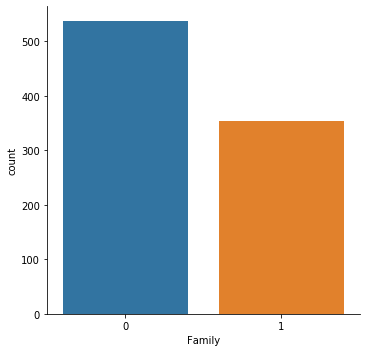

In [363]:
sns.catplot('Family', data=train_df, kind='count')

In [364]:
train_df.Family.mean()
# around 40% of people have family in the ship

0.39730639730639733

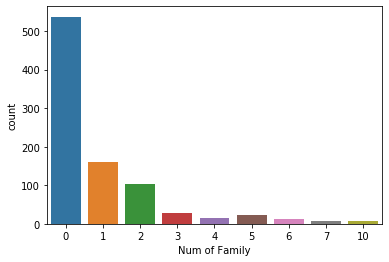

In [365]:
sns.countplot('Num of Family', data=train_df)

In [366]:
train_df[['Family', 'Num of Family']].groupby('Num of Family').count()

,Family
Num of Family,
0,537
1,161
2,102
3,29
4,15
5,22
6,12
7,6
10,7


In [367]:
# drop the usless features(SibSp	Parch	Ticket	Fare	Cabin)
train_df.drop(['SibSp', 'Parch', 'Ticket', 'FareBand', 'Cabin', 'PassengerId'], axis=1, inplace=True)
train_df.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Age_10,ClassEmbarked,Num of Family,Family
0,0,3,"Braund, Mr. Owen Harris",0,1,0,S,2,7.0,1,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,3,C,3,0.0,1,1
2,1,3,"Heikkinen, Miss. Laina",1,1,1,S,2,7.0,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,3,S,3,1.0,1,1
4,0,3,"Allen, Mr. William Henry",0,2,1,S,3,7.0,0,0


#### relationship between Sex and other features.

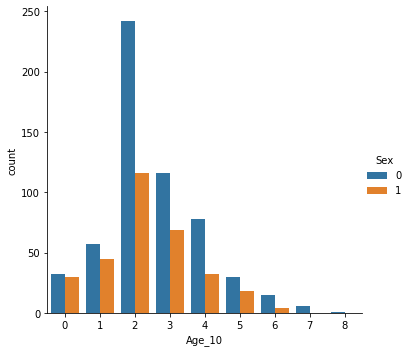

In [368]:
# Sex vs Age
sns.catplot('Age_10', hue='Sex', data=train_df, kind='count')

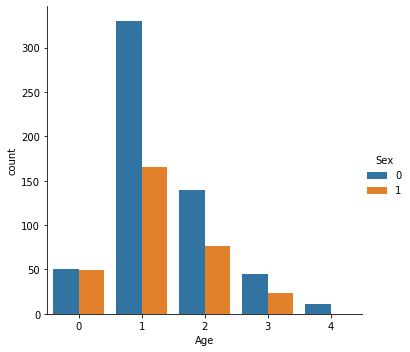

In [369]:
sns.catplot('Age', hue='Sex', data=train_df, kind='count')

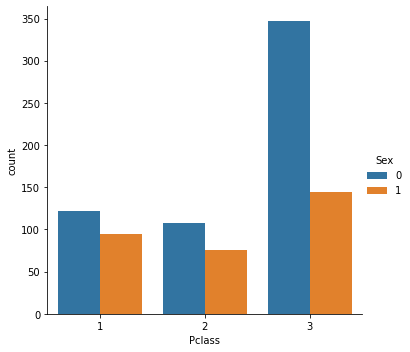

In [370]:
# Sex vs Pclass
sns.catplot('Pclass', hue='Sex', data=train_df, kind='count')

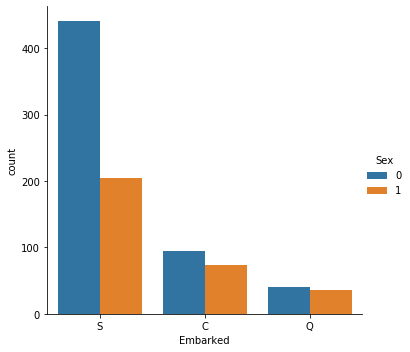

In [371]:
# Sex vs Embarked
sns.catplot('Embarked', hue='Sex', data=train_df, kind='count')

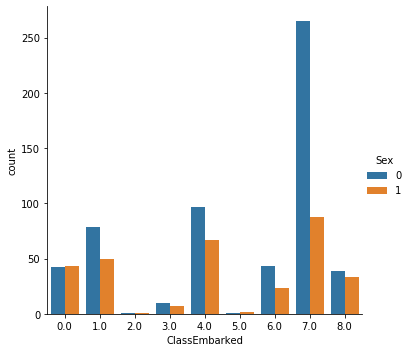

In [372]:
# Embarked & Pclass vs Sex
sns.catplot('ClassEmbarked', hue='Sex', data=train_df, kind='count')

In [373]:
# drop name

train_df.drop("Name", axis=1, inplace = True)

In [374]:
# change Ebarked to numerical data
train_df.Embarked.unique()

train_df.loc[(train_df['Embarked'] == 'C'), 'Embarked'] = 0
train_df.loc[(train_df['Embarked'] == 'S'), 'Embarked'] = 1
train_df.loc[(train_df['Embarked'] == 'Q'), 'Embarked'] = 2

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Age_10,ClassEmbarked,Num of Family,Family
0,0,3,0,1,0,1,2,7.0,1,1
1,1,1,1,2,3,0,3,0.0,1,1
2,1,3,1,1,1,1,2,7.0,0,0
3,1,1,1,2,3,1,3,1.0,1,1
4,0,3,0,2,1,1,3,7.0,0,0


##### Check the relationship between Survived and other features

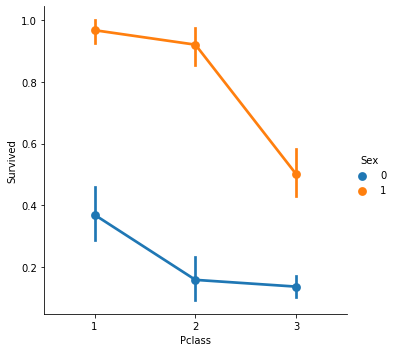

In [375]:
# Visualizaion

sns.catplot("Pclass", 'Survived', hue='Sex', data=train_df, kind='point')

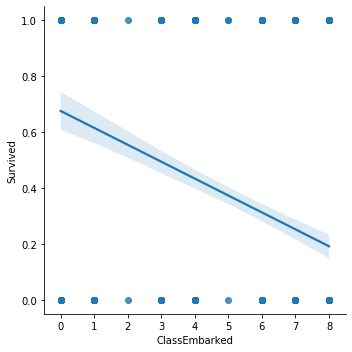

In [376]:
sns.lmplot("ClassEmbarked", "Survived", data=train_df)

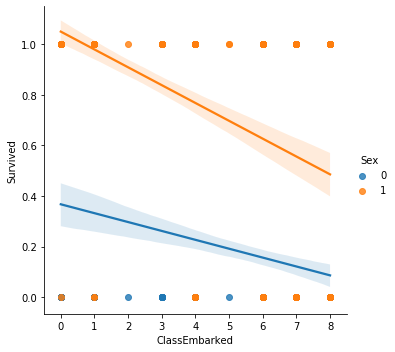

In [377]:
sns.lmplot("ClassEmbarked", "Survived",hue='Sex', data=train_df)

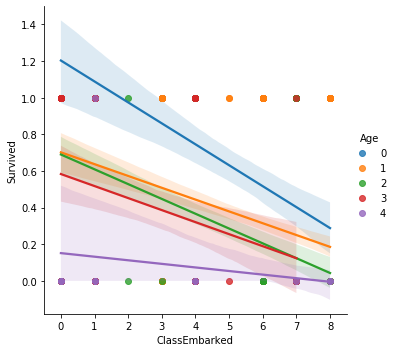

In [378]:
sns.lmplot("ClassEmbarked", "Survived", hue='Age', data=train_df)
# why over 1.0????

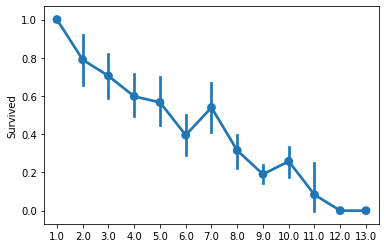

In [379]:
temp = (train_df.ClassEmbarked+1) + (train_df.Age)
sns.pointplot(temp, 'Survived', data=train_df)

train_df['temp01'] = (train_df.ClassEmbarked+1) + (train_df.Age)

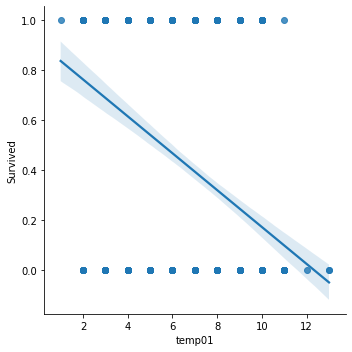

In [380]:
sns.lmplot("temp01", "Survived", data=train_df)

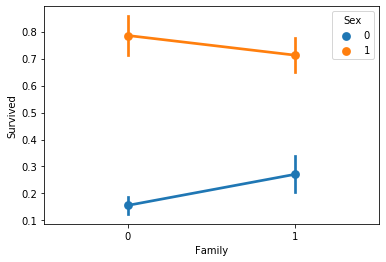

In [399]:
sns.pointplot("Family", "Survived", hue='Sex', data=train_df)

##  Logistic Regression

In [381]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [382]:
Y = train_df.Survived
X = train_df.drop("Survived", axis=1)
X.head()

,Pclass,Sex,Age,Fare,Embarked,Age_10,ClassEmbarked,Num of Family,Family,temp01
0,3,0,1,0,1,2,7.0,1,1,9.0
1,1,1,2,3,0,3,0.0,1,1,3.0
2,3,1,1,1,1,2,7.0,0,0,9.0
3,1,1,2,3,1,3,1.0,1,1,4.0
4,3,0,2,1,1,3,7.0,0,0,10.0


In [383]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [396]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

log_model = LogisticRegression()
log_model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [397]:
# Check the accuracy!
from sklearn import metrics
class_predict = log_model.predict(X_test)

print (metrics.accuracy_score(Y_test,class_predict))

0.820627802690583


#### Lets try overfit check

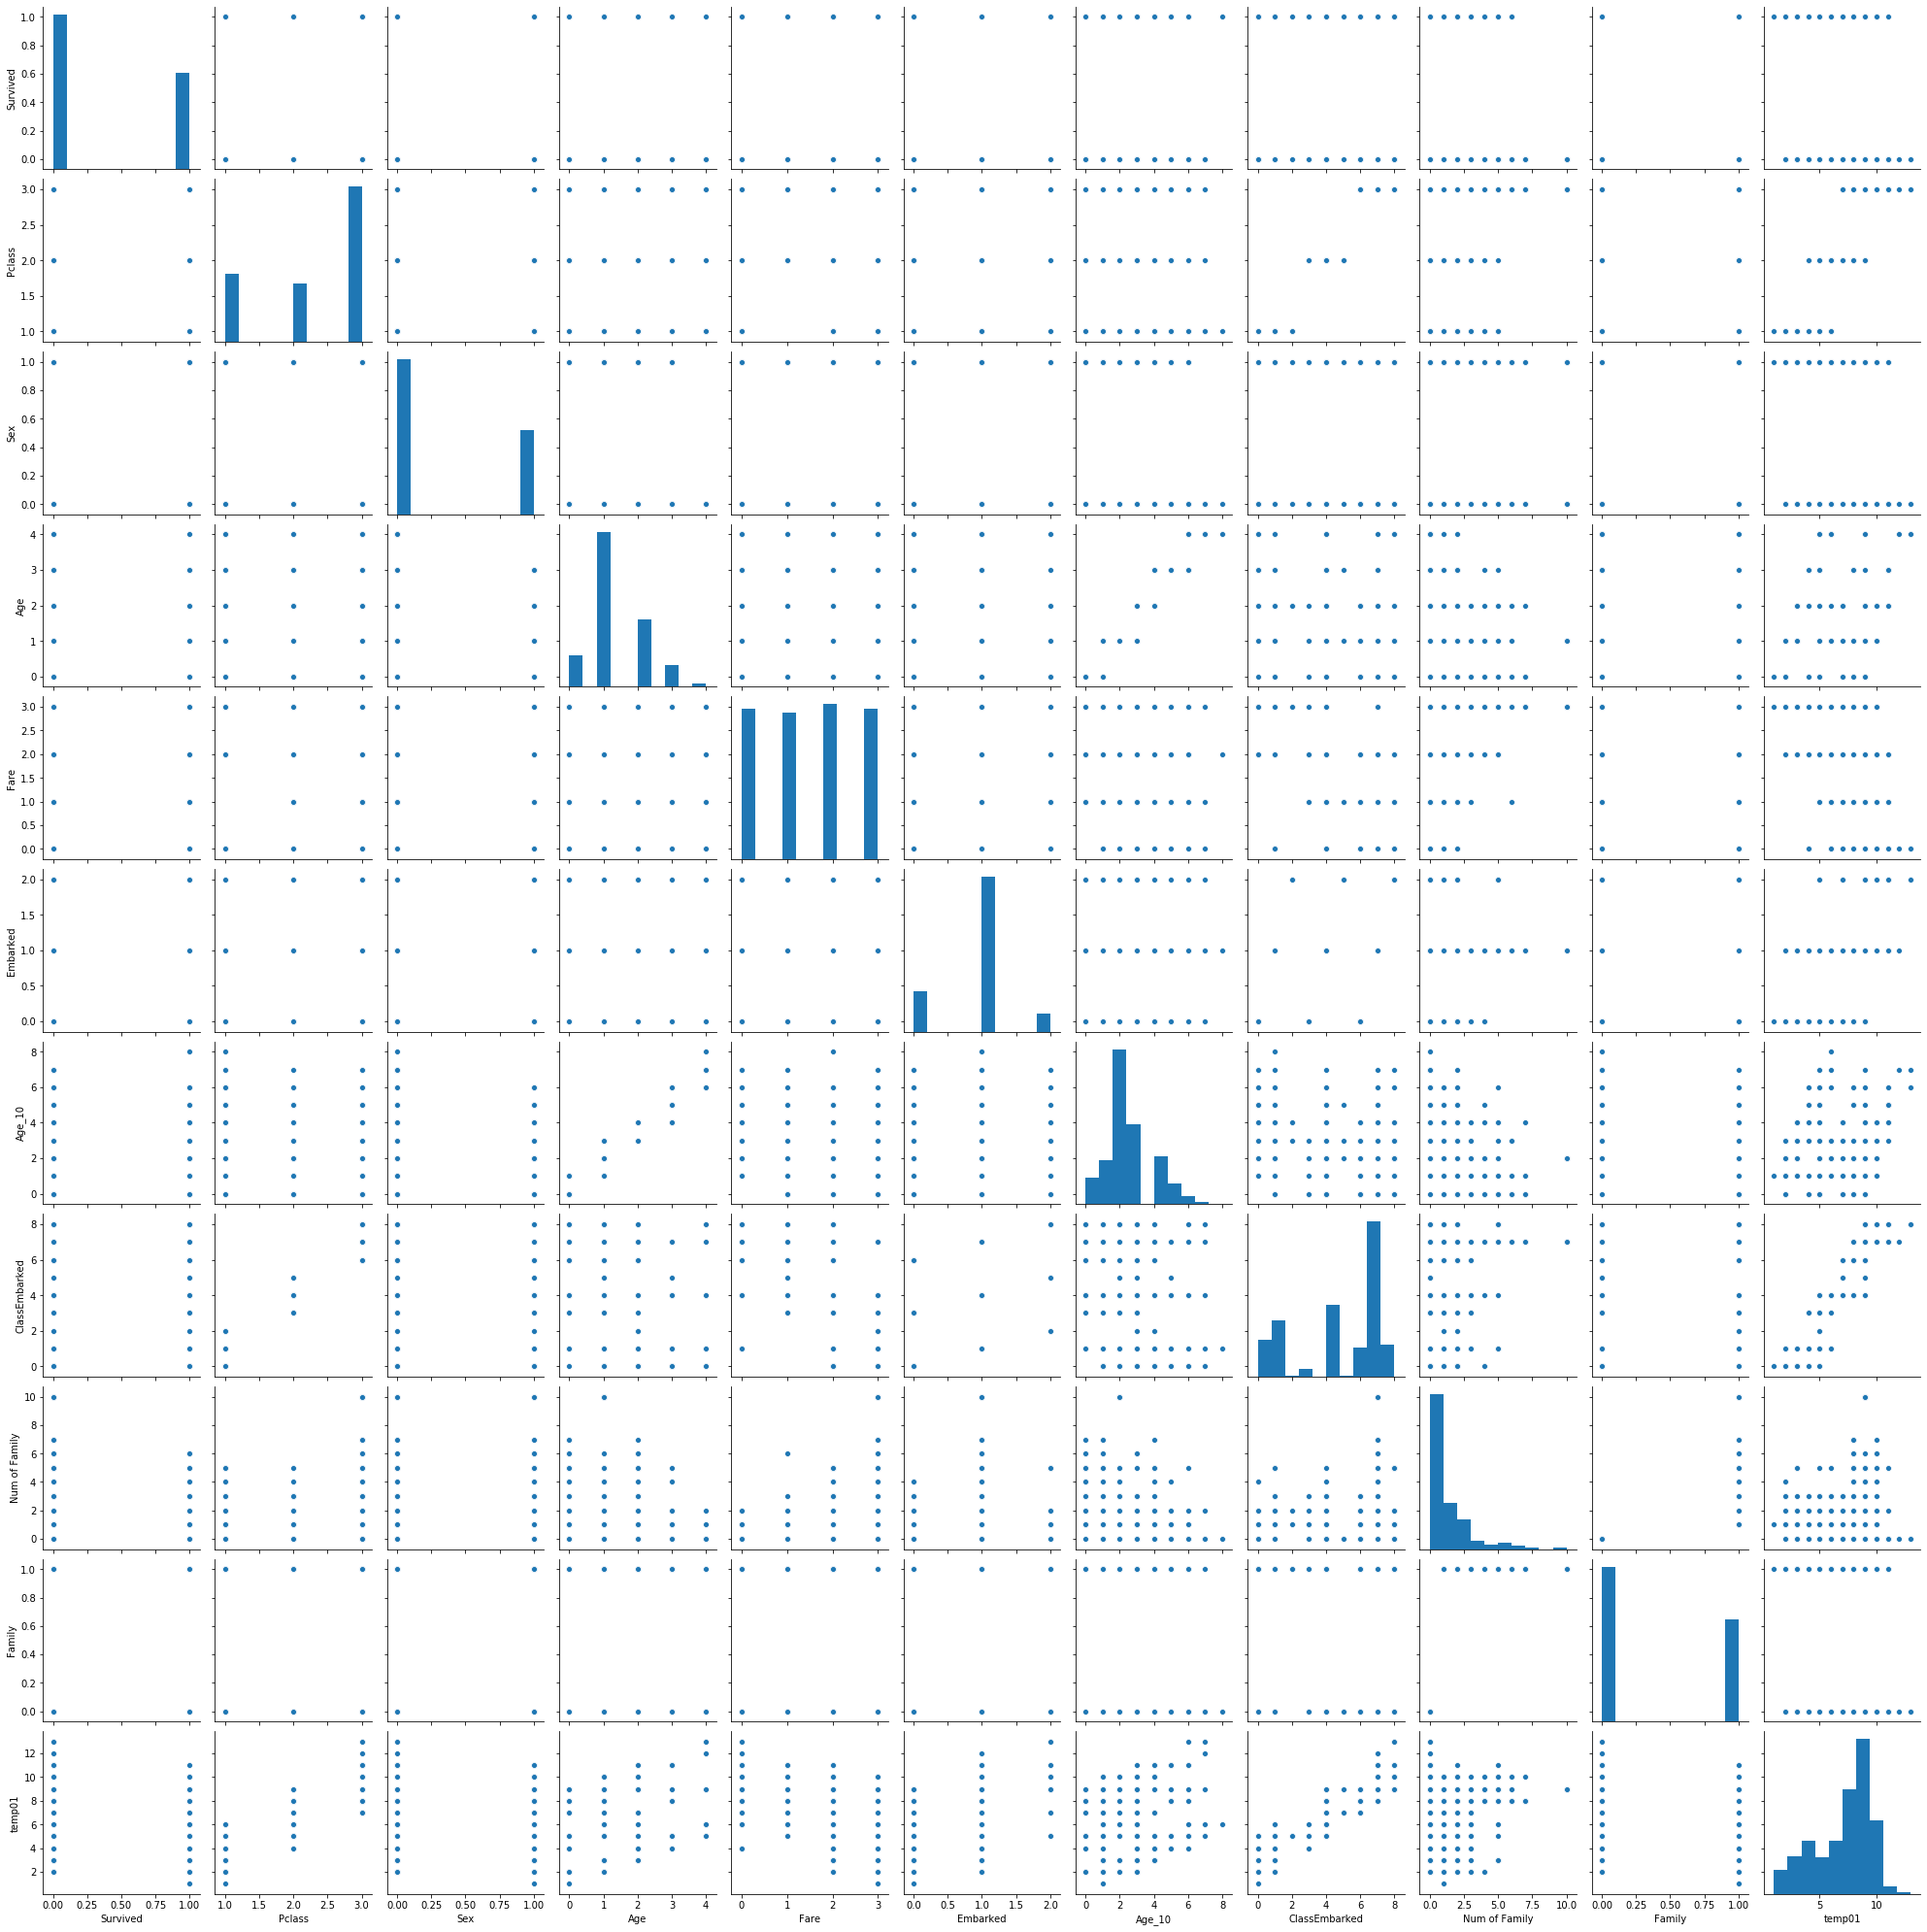

In [404]:
sns.pairplot(train_df)

### Linear Regression

In [413]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)